# Дипломный проект

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics as stats
import seaborn as sns

Загрузить файл hr.csv (можно найти во сложении к заданию)

In [2]:
data=pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


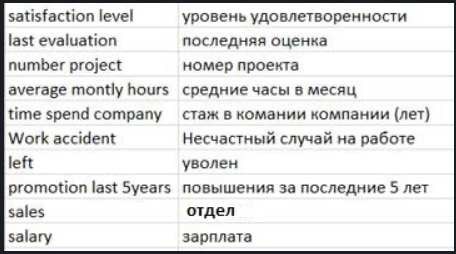

In [3]:
from IPython.display import Image
Image('Описание полей.png', width=500)

Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
col = data.columns.tolist()
col

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [6]:
for i in col:
    if (min(data[i]) * 0) == 0:
        print(i)
        print('Среднее: ', stats.mean(data[i]))
        print('Медиана: ', stats.median(data[i]))
        try:
            statistics.mode(data[i])
        except:
            print('Значение моды невозможно найти')
        else:
            print('Мода: ', stats.mode(data[i]))
        print('Минимальное значение: ', min(data[i]))
        print('Максимальное значение: ', max(data[i]))
        print('Среднее отклонение: ', stats.pstdev(data[i]))
        print()

satisfaction_level
Среднее:  0.6128335222348157
Медиана:  0.64
Значение моды невозможно найти
Минимальное значение:  0.09
Максимальное значение:  1.0
Среднее отклонение:  0.2486223626820733

last_evaluation
Среднее:  0.7161017401160077
Медиана:  0.72
Значение моды невозможно найти
Минимальное значение:  0.36
Максимальное значение:  1.0
Среднее отклонение:  0.1711634045107436

number_project
Среднее:  3.80305353690246
Медиана:  4
Значение моды невозможно найти
Минимальное значение:  2
Максимальное значение:  7
Среднее отклонение:  1.2325512654823438

average_montly_hours
Среднее:  201.0503366891126
Медиана:  200
Значение моды невозможно найти
Минимальное значение:  96
Максимальное значение:  310
Среднее отклонение:  49.94143446256218

time_spend_company
Среднее:  3.498233215547703
Медиана:  3
Значение моды невозможно найти
Минимальное значение:  2
Максимальное значение:  10
Среднее отклонение:  1.4600875552715114

Work_accident
Среднее:  0.1446096406427095
Медиана:  0
Значение моды нево

Рассчитать и визуализировать корреляционную матрицу для переменных

In [7]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1,0.10502,-0.14297,-0.020048,-0.10087,0.058697,-0.38837,0.025605
last_evaluation,0.10502,1,0.34933,0.33974,0.13159,-0.0071043,0.0065671,-0.0086838
number_project,-0.14297,0.34933,1,0.41721,0.19679,-0.0047405,0.023787,-0.006064
average_montly_hours,-0.020048,0.33974,0.41721,1,0.12775,-0.010143,0.071287,-0.0035444
time_spend_company,-0.10087,0.13159,0.19679,0.12775,1,0.0021204,0.14482,0.067433
Work_accident,0.058697,-0.0071043,-0.0047405,-0.010143,0.0021204,1,-0.15462,0.039245
left,-0.38837,0.0065671,0.023787,0.071287,0.14482,-0.15462,1,-0.061788
promotion_last_5years,0.025605,-0.0086838,-0.006064,-0.0035444,0.067433,0.039245,-0.061788,1


**Видим что уровень удовлетворенности обратно коррелирует с увольнением, что дает возможность предположить о меньшем риске ухода сотрудников с высоким уровнем удовлетворенности**

Визуализировать несколько взаимосвязей между переменными

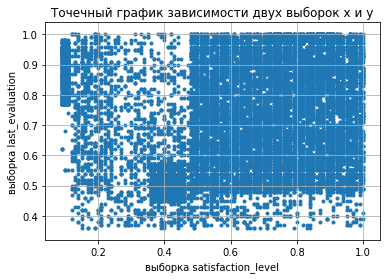

In [8]:
satisfaction_level = data.satisfaction_level
last_evaluation = data.last_evaluation
plt.xlabel('выборка satisfaction_level')
plt.ylabel('выборка last_evaluation')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(satisfaction_level, last_evaluation, marker='.')

** Видим что наибольшая плотность в правом верхнем углу, это значит что люди получившие высокую оценку более удовлетворены**

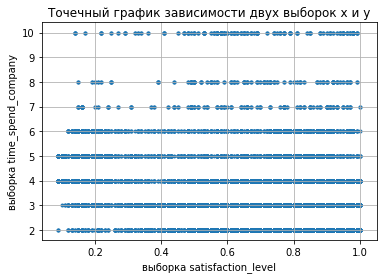

In [9]:
satisfaction_level = data.satisfaction_level
time_spend_company = data.time_spend_company
plt.xlabel('выборка satisfaction_level')
plt.ylabel('выборка time_spend_company')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(satisfaction_level, time_spend_company, marker='.')

**Видим что работники проработавшие в компании более 6-ти лет имеют более высокий уровень удовлетворенности** 

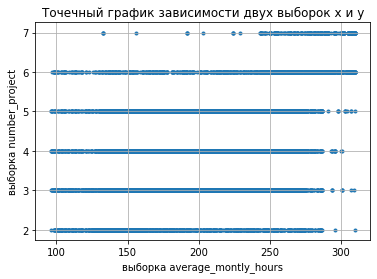

In [10]:
number_project = data.number_project
average_montly_hours = data.average_montly_hours
plt.xlabel('выборка average_montly_hours')
plt.ylabel('выборка number_project')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(average_montly_hours, number_project, marker='.')	

** Люди имеющие больше 5-ти проектов имеют тенденцию перерабатывать**

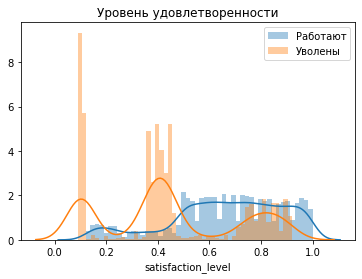

In [11]:
sat_lev_rab = data[data['left']==0]['satisfaction_level']

sat_lev_uv = data[data['left']==1]['satisfaction_level']

sns.distplot(sat_lev_rab, 50)
sns.distplot(sat_lev_uv, 50)
plt.title('Уровень удовлетворенности')
plt.legend(['Работают', 'Уволены'])
plt.show()

**Видим что уровень удовлетворенности у уволенных смещен влево относительно работающих и имеет более выраженные пики на низких оценках. Подтверждается гипотеза что низкий уровень удовлетворенности способствует увольнению**

С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [12]:
print(sts.ttest_ind(sat_lev_uv, sat_lev_rab))

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)


*Имеется статистическое различие между уровнем удовлетворенности у работающих и уволенных сотрудников, т.к. p-value стремится к нулю, что намного меньше стандартной альфа ошибки 0.05*

** Это значит что уровень удовлетворенности различен и отслеживая его можно прогнозировать увольнение**

In [13]:
from scipy.stats import pearsonr
r, p = pearsonr(data['satisfaction_level'], data['last_evaluation'])
print(r, p)
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

0.1050212139714849 4.70431155828217e-38
Probably dependent


*Кореляция между уровнем удовлетворенности и последней оценкой сотрудников очень слабая, т.к. коэффициент Пирсона составляет всего 0,1*

Рассчитать сколько работников работает в каждом департаменте

In [14]:
data1 = data[['sales', 'satisfaction_level']].groupby('sales').count()
data1

,satisfaction_level
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


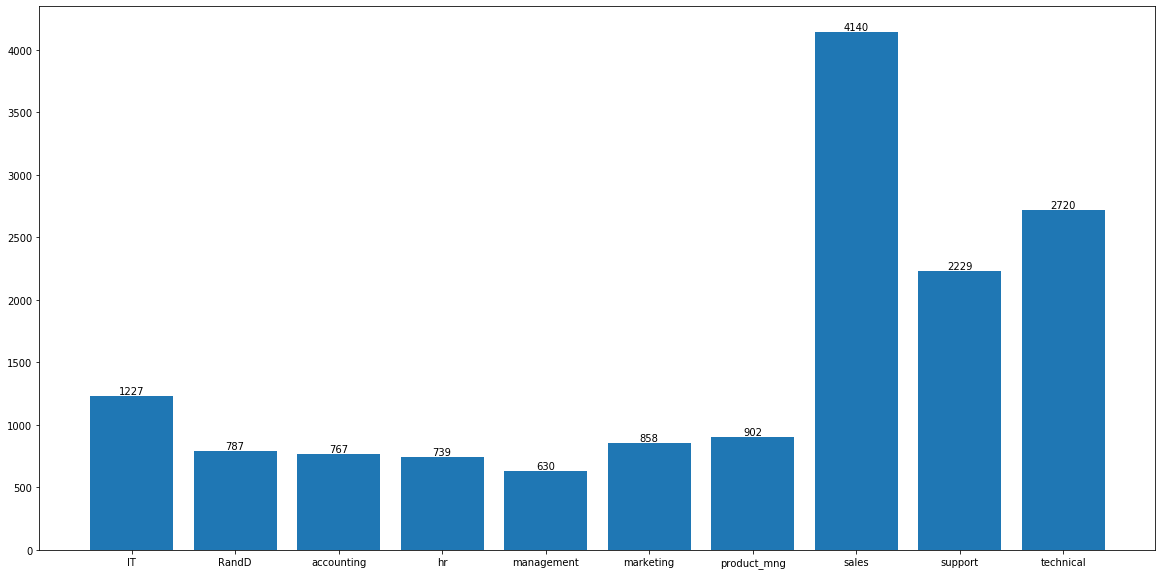

In [15]:
plt.figure(figsize=(20,10))
plt.bar(data1.index, data1['satisfaction_level'], label=data1['satisfaction_level'])
for x, y in zip(data1.index, data1['satisfaction_level']):
    plt.text(x, y, y, ha='center', va = 'bottom')

**Видим что большинство сотрудников занимаются продажами**

Показать распределение сотрудников по зарплатам

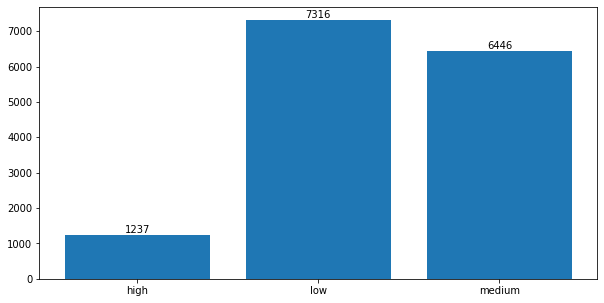

In [16]:
data1 = data[['salary', 'satisfaction_level']].groupby('salary').count()

plt.figure(figsize=(10,5))
plt.bar(data1.index, data1['satisfaction_level'], label=data1['satisfaction_level'])
for x, y in zip(data1.index, data1['satisfaction_level']):
    plt.text(x, y, y, ha='center', va = 'bottom')

** Наблюдается перекос по зарплатам в сторону нижнего уровня**

Показать распределение сотрудников по зарплатам совместно с департаментами

In [17]:
data.pivot_table(['satisfaction_level'],['sales', 'salary'], aggfunc='count', fill_value = 0)

satisfaction_level
sales       salary                    
IT          high                    83
            low                    609
            medium                 535
RandD       high                    51
            low                    364
            medium                 372
accounting  high                    74
            low                    358
            medium                 335
hr          high                    45
            low                    335
            medium                 359
management  high                   225
            low                    180
            medium                 225
marketing   high                    80
            low                    402
            medium                 376
product_mng high                    68
            low                    451
            medium                 383
sales       high                   269
            low                   2099
            medium                1772
support     high                   141
            low                   1146
            medium                 942
technical   high                   201
            low                   1372
            medium                1147

In [18]:
data2 = data[['sales', 'salary', 'satisfaction_level']].groupby(['sales', 'salary']).count().reset_index()
data2

,sales,salary,satisfaction_level
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


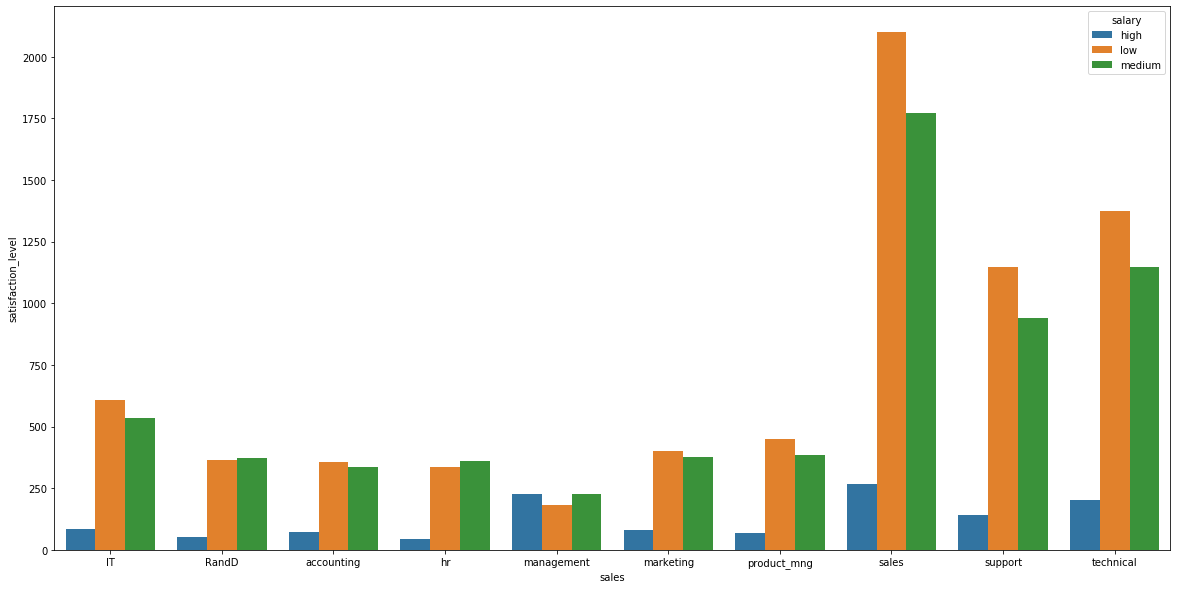

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x=data2['sales'], y=data2['satisfaction_level'], hue=data2['salary'], data=data2)


**Традиционно более равномерное распределение зарплат у менеджмента, по остальным подразделениям высокая ЗП составляетя незначительную часть, в основном преобладают низкие зарплаты**

Сколько сотрудников покинули компанию

In [20]:
a = len(data[data['left']==1])
b = len(data['left'])
c = (a / b) * 100
print(f'Покинуло компанию {a} из {b} сотрудников, что составило {round(c, 1)} %')

Покинуло компанию 3571 из 14999 сотрудников, что составило 23.8 %


**учитывая что период наблюдений неизвестен, но можно предположить что не менее 5-ти лет судя по  столбцу "promotion_last_5years", тогда текучесть кадров составляет менее 5% в год, что является достаточно нормальным**

Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

*Гипотеза - сотрудник увольняется если у него отсутствует карьерный рост*

In [21]:
promotion_last_5years_yes = data[(data['left'] == 1) & (data['promotion_last_5years'] == 1)]['left']

promotion_last_5years_no = data[(data['left'] == 1) & (data['promotion_last_5years'] == 0)]['left']

a,b = len(promotion_last_5years_yes), len(promotion_last_5years_no)

print(f'Сотрудников получавших повышение перед увольнением - {a}, не получавших - {b}')

Сотрудников получавших повышение перед увольнением - 19, не получавших - 3552


*Гипотеза подтверждена - абсолютное большинтво уволившихся сотрудников не имели повышения в последние 5 лет*

*Гипотеза - увольнению сотрудника способствуют переработки*

In [22]:
time_uv = data[data['left']==1]['average_montly_hours']
time_rab = data[data['left']==0]['average_montly_hours']

print(f'Среднее время уволенных - {time_uv.mean()}, работающих - {time_rab.mean()}')
print(sts.ttest_ind(time_uv, time_rab))

Среднее время уволенных - 207.41921030523662, работающих - 199.0602030101505
Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)


*Гипотеза подтверждена - Имеется статистическое различие между средней загрузкой у работающих и уволенных сотрудников, т.к. p-value стремится к нулю, что намного меньше стандартной альфа ошибки 0.05*

*Гипотеза - низкая зарплата способствует увольнению*

In [23]:
salary_uv = data[(data['left']==1)]['average_montly_hours'].count()
salary_uv_low = data[(data['left']==1) & (data['salary'] == 'low')]['average_montly_hours'].count()
salary_rab = data[(data['left']==0)]['average_montly_hours'].count()
salary_rab_low = data[(data['left']==0) & (data['salary'] == 'low')]['average_montly_hours'].count()

print(f'Низкая зарплата среди уволенных - {round(salary_uv_low/salary_uv*100,1)} %, среди работающих - {round(salary_rab_low/salary_rab*100,1)} %')

Низкая зарплата среди уволенных - 60.8 %, среди работающих - 45.0 %


*Гипотеза подтверждена - низкая зарплата среди уволенных встречается на треть чаще, чем среди работающих*